# 데이터전처리(Preprocessing)
- 정의 : 데이터의 품질을 올리는 과정

- 과정
  1. 데이터의 실수화(Data Vectorization) : 연속형 자료 / 범주형 자료 / 텍스트 자료
  2. 불완전한 데이터 제거 : NULL, NA, NAN 제거
  3. 잡음섞인 데이터 제거 (ex1. 가격 데이터에 음수값이 있는 경우, ex2. 연령데이터에 과도하게 큰 값이 있는 경우)
  4. 모순된 데이터 제거 (ex. 주민등록번호 데이터의 남성의 주민번호가 2나 4로 시작하는 경우)
  5. 불균형 데이터 제거 : 특정 class의 데이터가 많거나/적거나 -> undersampling, oversampling

- 기법
  1. 데이터 실수화(Data Vectorization)
  2. 데이터 정제(Data Cleaning) : 없는 데이터를 채우고, 잡음 데이터 제거하고, 모순 데이터를 올바른 데이터로 교정
  3. 데이터 통합(Data Integration) : 여러 개의 데이터 파일을 하나로 합침
  4. 데이터 축소(Data Reduction) : 데이터의 수를 줄이는 방법(oversampling, undersampling), 데이터의 차원을 축소하는 방법
  5. 데이터 변환(Data Transformation) : 정규화 or 표준화, log화 등
  6. 데이터 균형(Data Balancing) : class의 균형을 맞춤 - oversamling, undersamling

### 데이터 실수화(Data Vectorization)
  1. 연속형 자료(Continuous data) : 구간으로 나누고, 그 구간마다 index를 지정함
  2. 범주형 자료(Categorical data)
  3. 텍스트 자료(Text data)

#### 범주형 자료의 실수화



- One-hot encoding
  - 0과 1으로 mapping 하는 것
  - from sklearn.feature_extraction import DictVectorizer 

In [ ]:
# 범주형 자료의 수량화
x = [{'city' : 'Seoul', 'temp' : 10.0},
     {'city': 'Dubai', 'temp' : 33.5},
     {'city' : 'LA', 'temp' : 20.0}]
x

[{'city': 'Seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

    - .fit_transform() : 변환 시작!
    - DictVectorizer() : default sparse = True ( COO, CSR형태 )
    - DictVectorizer(sparse=False) : COO, CSR표현식 압축해제
    - .fit_transform().toarray() : CSR표현의 압축을 풀기 위해 사용

In [ ]:
from sklearn.feature_extraction import DictVectorizer # 실수화
vec = DictVectorizer(sparse=False) # 압축해제 / defalut값 : sparse = True -> 희소행렬 형태이기 때문에 눈으로 확인 불가
vec.fit_transform(x) # x를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

- 희소행렬 : 대부분의 원소의 값이 0인 행렬 => 메모리 낭비가 심함
  - 해결방법 : COO, CSR 표현식 (압축느낌) -> 눈으로 확인 불가

In [ ]:
vec1 = DictVectorizer(sparse=True) # sparse = True : 다시 압축(COO, CSR 표현식으로 나타내겠다!)
x1 = vec1.fit_transform(x) # .fit_transform : 변환 시작!
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse = True : 압축한 상태 => data를 가시적으로 확인할 수 없음
# .toarray() == sparse = False : 압축 해제

x1.toarray() # .toarray() : sparse = True를 풀고 배열로 변경
vec.get_feature_names() # sparse = False / toarray() 로 CSR표현 압축 해제한 형태에서만 get_feature_names() 사용 가능

# x1.get_feature_names() # : CSR 표현식이기 떄문에 확인 불가!!

['city=Dubai', 'city=LA', 'city=Seoul', 'temp']

#### 텍스트 자료의 실수화

- 단어의 출현 횟수를 이용한 데이터 실수화
  - from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# text 자료의 수량화
text = ['떴다 떴다 비행기 날아라 날아라',
        '높이 높이 날아라 우리 비행기',
        '내가 만든 비행기 날아라 날아라',
        '멀리 멀리 날아라 우리 비행기']

text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer() # dafault값 : sparse = True
t = vec2.fit_transform(text).toarray() # toarray() : sparse=False (압축해제)
t

array([[2, 0, 0, 2, 0, 0, 1, 0],
       [1, 0, 2, 0, 0, 0, 1, 1],
       [2, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 2, 1, 1]])

In [ ]:
import pandas as pd # data를 표로 보기 위해
t1 = pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [ ]:
vec2.get_feature_names()

['날아라', '내가', '높이', '떴다', '만든', '멀리', '비행기', '우리']

- TF-IDF(Term Frequency Inverse Document Frequency) 기법
  - 가중치를 재계산 하는 방법
  - a, the와 같은 관사처럼 자주 등장하여 분석에 의미를 갖지 못하는 단어의 중요도를 낮추는 기법
  - from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x2 = tfid.fit_transform(text).toarray() # 가중치 재계산
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


### 데이터 변환(Data Transformation)
- 데이터가 가진 특성간 크기 편차를 줄이기 위해
- 변환법(2) : 0~1 사이의 값을 가지게 됨
  - 표준화 : bell-shape / 이상치가 존재할 때 유용
    - x_std = (x-mean(x))/sd(x)
  - 정규화 : 일반적으로 표준화보다 유용
    - x_nor = (x-min(x))/(max(x)-min(x))

### 데이터 정제(Data Cleaning)
  - 결측 데이터 채우기(Empty Values)
    - 결측 데이터 : np, nan, npNaN, None
    - 평균(mean) / 중위수(median) / 최빈수(most frequent value) 로 대체
    - 사용가능 함수
      - sklearn의 Imputer() : 평균, 중위수, 최빈수 선택
      - sklearn의 dropna(), filna() : 결측 데이터를 0으로
    - from sklearn.impute import SimpleImputer

In [ ]:
  import numpy as np
  x_miss=np.array([[1,2,3,None],
                   [5, np.NAN, 7, 8],
                   [None, 10, 11, 12],
                   [13, np.nan, 15, 16]])
  x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values = np.nan, strategy='mean') # median : 중위값
im.fit(x_miss)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

### 데이터 통합(Data Integration)
- 여러 개의 파일을 하나로 합침
    - pandas의 merge()함수 사용
    - pandas의 df.dtypes로 변수의 자료 타입 확인

In [ ]:
# [1]
# www.kaggle.com 에서 www.kaggle.com/c/rossmann-store-sales/data 에서 자료 다운로드
# zip 풀어서 파일 colab에 업로드

# [2]
# 제공되는 파일 업로드

# import pandas as pd
# df1 = pd.read_csv('train.csv', engine='python') -> 파일경로 왜 안되냐..??? 어????!?!?!?!?!?
# print(df1.shape)
# type(df1)
# df1.head()

# df2=pd.read_csv('store.csv', engine='python')
# df2.shape
#df2.head()

# df= pd.merge(df1, df2, on='Store')
# df.shape
# df.dtypes

### 데이터 불균형(Data Imbalance)
  - 머신러닝의 목적이 '분류'일 때, 특정 클래스의 관측치가 다른 클래스에 비해 매우 낮게 나타날 때
  - 불균형 데이터 해소 기법(2) : undersampling, oversampling
    - undersampling : 다수클래스의 표본을 임의로 학습데이터로부터 제거하는 것
      - from imblearn.under_sampling import NearMiss
    - oversampling : 소수 클래스의 표본을 복제하여 학습데이터에 추가하는 것
      - SMOTE : from imblearn.over_sampling import SMOTE
      - ADASYN : from imblearn.over_sampling import ADASYN
  - 의사결정나무와 앙상블은 상대적으로 불균형자료에 강인한 특성을 보임
  - .fit.resample() : 다시 sampling

- 불균형 데이터 생성

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification 

# 불균형 데이터 생성
X, y = make_classification(n_classes = 3, weights = [0.03, 0.07, 0.9],
                           n_features = 2, n_informative = 2, n_redundant = 0,
                           n_clusters_per_class = 1, n_samples = 200, random_state = 10
                           )

print('Original dataset shape %s'% Counter(y))

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


- 데이터 시각화

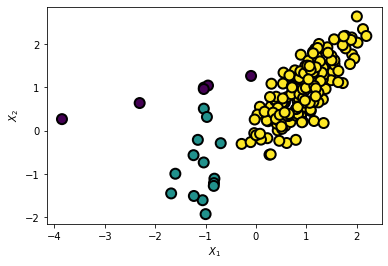

In [ ]:
# 데이터 시각화 (matplot.pyplot)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c = y,
            s = 100, edgecolor = 'k', linewidth = 2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

- oversampling(1) : SMOTE
  - from imblearn.over_sampling import SMOTE

In [ ]:
# Oversamling : SMOTE
from imblearn.over_sampling import SMOTE, ADASYN # 데이터 불균형 해결

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y) # SMOTE의 메쏘드
print('Resampled dataset shape from SMOTE %s' %Counter(y_res))

Resampled dataset shape from SMOTE Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

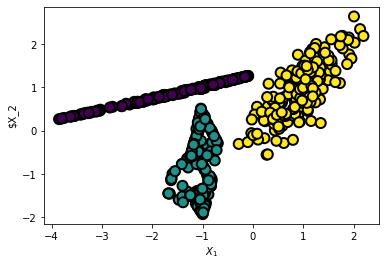

In [ ]:
plt.scatter(X_res[:, 0], X_res[:,1], marker='o', c=y_res,
            s=100, edgecolor='k', linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2")
plt.show()

- oversampling(2) : ADASYN
  - from imblearn.over_sampling import ADASYN

In [ ]:
# Oversamling : ADASYN
ada = ADASYN(random_state=0)
X_syn, y_syn = ada.fit_resample(X, y)
print('Resampled dataset shape from ADASYN %s'%Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


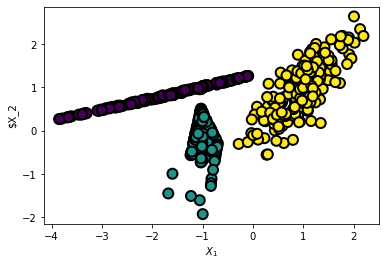

In [ ]:
plt.scatter(X_syn[:, 0], X_syn[:,1], marker='o', c=y_syn,
            s=100, edgecolor='k', linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2")
plt.show()

- undersampling : NearMiss
  - from imblearn.under_sampling import NearMiss

In [ ]:
# undersampling : NearMiss
from imblearn.under_sampling import NearMiss

# undersample이라는 undersampling method 정의
undersample = NearMiss(version = 3, n_neighbors_ver3 = 3)

X_Under, y_Under = undersample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

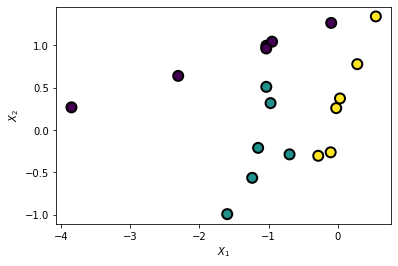

In [ ]:
plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s = 100, edgecolor='k', linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()